### Se trata de explorar con estos datos las tecnicas de clasificacion mediante KNN y RNN

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Select the dataset

In [6]:
import kagglehub
import os

In [7]:
#Mushrooms example
path = kagglehub.dataset_download('uciml/mushroom-classification')

In [8]:
aux = [name for name in os.listdir(path) if ".csv" in name][0]
path = os.path.join(path,aux)
data =  pd.read_csv(path)

In [9]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
y = data['class']  # Columna 'class' como variable objetivo
X = data.drop('class', axis=1)  # Eliminar la columna 'class' del resto de los datos

In [11]:
# Al final si fue necesario necesario representar numericamente los valores categoricos
encoder = LabelEncoder()
# Codificar todas las columnas categóricas 
X = X.apply(encoder.fit_transform)

In [12]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


## Split the dataset into training and testing sets.

In [13]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# COmo los datos vienen de datos categoricos, no normalizamos
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

## Create and train the k-Nearest Neighbors (KNN) model.

In [15]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [16]:
# Create a list of k values for KNN
k_values = [1, 5, 11, 15, 21]

# Train KNN models with different k values and store the results
knn_results = {}
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_results[k] = {
        'model': knn_model,
        'y_pred': y_pred_knn,
        'accuracy': accuracy_score(y_test, y_pred_knn)
    }


## Create and train the Radius Neighbors (RNN) model.

In [31]:
# Create a list of radius values for RNN
radius_values = [3, 6, 9, 12, 15, 18, 21]

# Train RNN models with different radius values and store the results
rnn_results = {}
for radius in radius_values:
    rnn_model = RadiusNeighborsClassifier(radius=radius)
    rnn_model.fit(X_train, y_train)
    y_pred_rnn = rnn_model.predict(X_test)
    rnn_results[radius] = {
        'model': rnn_model,
        'y_pred': y_pred_rnn,
        'accuracy': accuracy_score(y_test, y_pred_rnn)
    }

## Compare the performance of KNN and RNN models.

In [32]:
# Print the accuracy of KNN models
print("KNN Accuracy:")
for k, result in knn_results.items():
    print(f"K = {k}: {result['accuracy']:.2f}")

# Print the accuracy of RNN models
print("\nRNN Accuracy:")
for radius, result in rnn_results.items():
    print(f"Radius = {radius}: {result['accuracy']:.2f}")



KNN Accuracy:
K = 1: 1.00
K = 5: 1.00
K = 11: 1.00
K = 15: 0.99
K = 21: 0.99

RNN Accuracy:
Radius = 3: 1.00
Radius = 6: 0.92
Radius = 9: 0.80
Radius = 12: 0.68
Radius = 15: 0.52
Radius = 18: 0.52
Radius = 21: 0.52


## Visualize the prediction results for KNN and RNN.

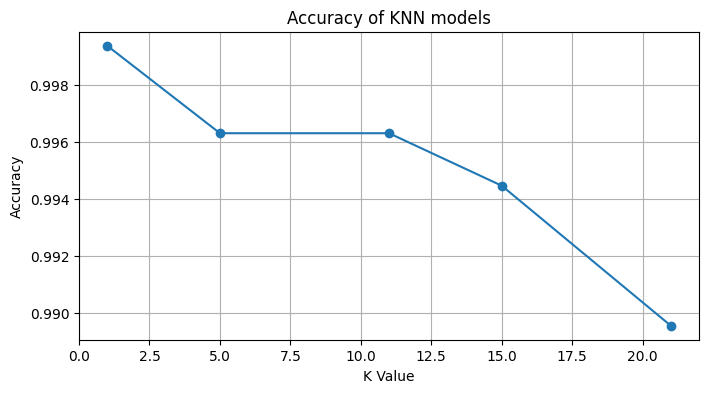

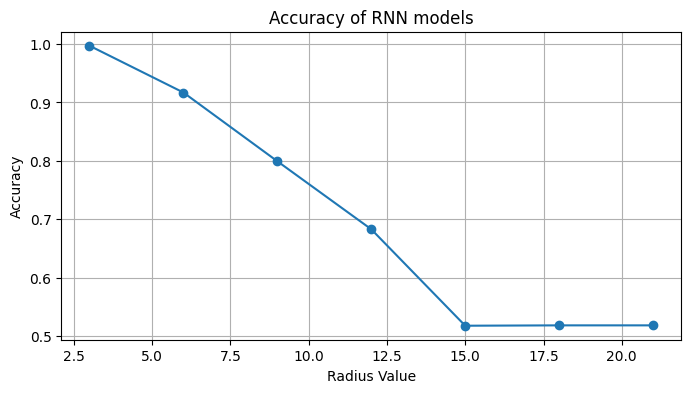

In [33]:
# Visualize the accuracy of KNN models
k_values = [k for k in knn_results.keys()]
k_accuracies = [result['accuracy'] for result in knn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models')
plt.grid(True)
plt.show()

# Visualize the accuracy of RNN models
radius_values = [radius for radius in rnn_results.keys()]
radius_accuracies = [result['accuracy'] for result in rnn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(radius_values, radius_accuracies, marker='o')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of RNN models')
plt.grid(True)
plt.show()